In [1]:
from diffusers import StableDiffusionPipeline
import torch
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt
import math

/home/utopia/anaconda3/envs/lora/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [2]:
def display_images_with_titles(images, titles, max_images_per_row):
    num_images = len(images)
    rows = math.ceil(num_images / max_images_per_row)
    cols = min(num_images, max_images_per_row)
    
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)  # 增加子图之间的间距
    
    if rows == 1 and cols == 1:
        axes = np.array([axes])
    elif rows == 1 or cols == 1:
        axes = axes.ravel()
    
    for i, (img, title) in enumerate(zip(images, titles)):
        row = i // max_images_per_row
        col = i % max_images_per_row
        ax = axes[row, col] if rows > 1 else axes[i]
        ax.imshow(img)
        ax.set_title(title, fontsize=10, wrap=True)  # 调整字体大小，允许标题换行
        ax.axis('off')
    
    # 隐藏多余的子图
    for i in range(num_images, rows*cols):
        row = i // max_images_per_row
        col = i % max_images_per_row
        ax = axes[row, col] if rows > 1 else axes[i]
        ax.axis('off')
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [3]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
prompts = ["a walking cut white dog with big eyes",
           "a walking cut white dog with big eyes from behind view",
           "a walking cut white dog with big eyes from rear view",
           "a walking cut white dog with big eyes from back view"
          ]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

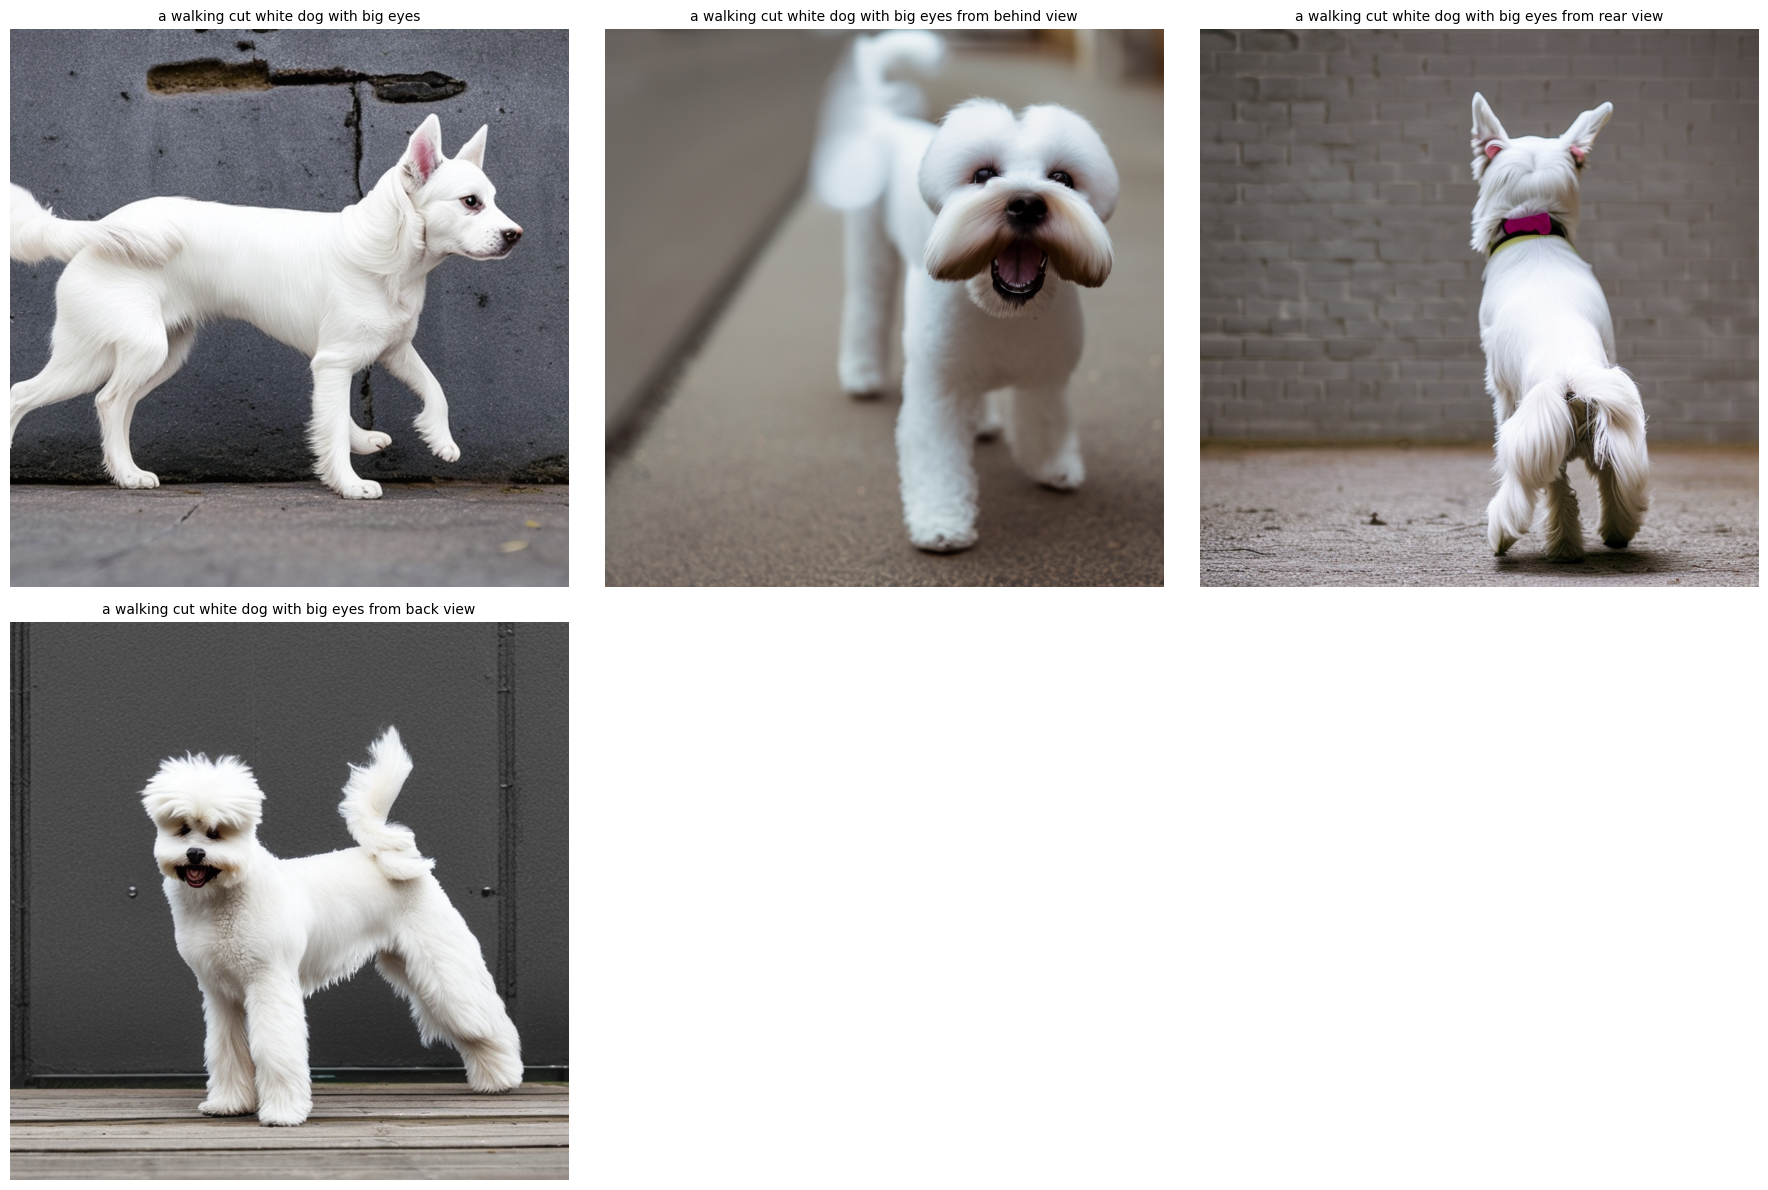

In [10]:
results = []
for i, prompt in enumerate(prompts):
    image = pipe(
        prompt,
        num_inference_steps = 50,
        guidance_scale = 7.5,
        generator=generator,
        # latents=fixed_noise
    ).images[0]
    results.append(image)
display_images_with_titles(results, prompts, 3)

In [3]:
pipe_original = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)
pipe_original = pipe_original.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
results = []
for i, prompt in enumerate(prompts):
    image = pipe_original(
        prompt,
        num_inference_steps = 50,
        guidance_scale = 9,
        generator=generator,
        # latents=fixed_noise
    ).images[0]
    results.append(image)
display_images_with_titles(results, prompts, 3)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
generator = torch.Generator("cuda").manual_seed(24)

In [8]:
fixed_noise = torch.randn((1, pipe.unet.in_channels, pipe.unet.sample_size, pipe.unet.sample_size), dtype=torch.float16)

/tmp/ipykernel_8240/3451736232.py:1: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  fixed_noise = torch.randn((1, pipe.unet.in_channels, pipe.unet.sample_size, pipe.unet.sample_size), dtype=torch.float16)
